In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

In [5]:
car_data = pd.read_csv("car_price_data1.csv")

In [8]:
car_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


# Preprocessing
## Explore descriptive statistic dari variable

In [14]:
car_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


In [15]:
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4345 entries, 0 to 4344
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Brand         4345 non-null   object 
 1   Price         4173 non-null   float64
 2   Body          4345 non-null   object 
 3   Mileage       4345 non-null   int64  
 4   EngineV       4195 non-null   float64
 5   Engine Type   4345 non-null   object 
 6   Registration  4345 non-null   object 
 7   Year          4345 non-null   int64  
 8   Model         4345 non-null   object 
dtypes: float64(2), int64(2), object(5)
memory usage: 305.6+ KB


### Buang model yang gak dibutuhkan untuk dibuat modeling

In [16]:
df = car_data.drop(labels='Model', axis=1)

### Check missing value 

In [17]:
df.isna().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

### buang semua nilai nan, tapi ini tidak disarankan,
### Tapi ketika menghapus kurang dari 5% dari data, maka tidak apa-apa

In [18]:
df_no_mv = df.dropna()

# Data Exploration
### Distribusi probabilitas akan menunjukkan bagaimana variabel didistribusikan

Text(0.5, 1.0, 'Car Price Distribtion Plot')

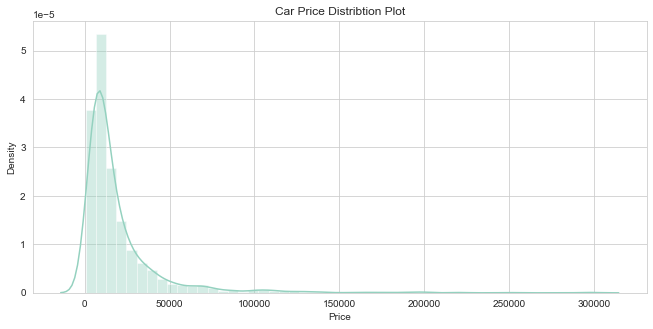

In [19]:
#Melihat anomali dan outliers
plt.figure(figsize=[11,5])
sns.distplot(df_no_mv['Price'])
plt.title('Car Price Distribtion Plot')

Text(0.5, 1.0, 'Plot distribusi EngineV')

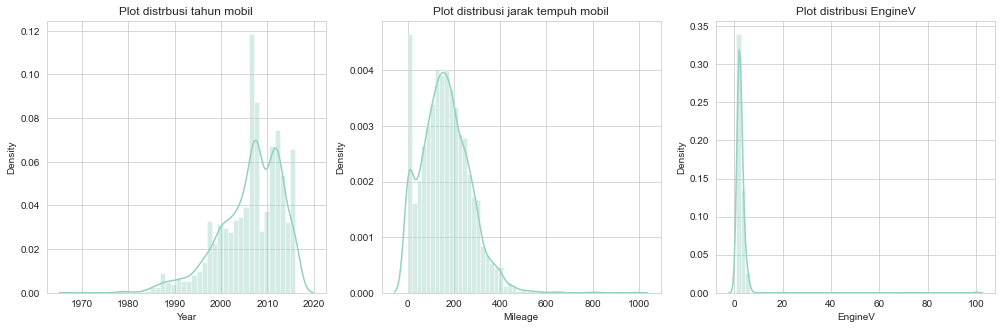

In [21]:
#Distribusi mobil dan jarak tempuh
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.distplot(df_no_mv['Year'])
plt.title('Plot distrbusi tahun mobil')

plt.subplot(1,3,2)
sns.distplot(df_no_mv['Mileage'])
plt.title('Plot distribusi jarak tempuh mobil')

plt.subplot(1,3,3)
sns.distplot(df_no_mv['EngineV'])
plt.title('Plot distribusi EngineV')

In [22]:
# Di sini, outlier terletak di sekitar harga yang lebih tinggi (sisi kanan grafik)
# kita dapat mengatasi masalah dengan mudah dengan menghapus 0,5%, atau 1% dari sampel yang bermasalah
# Ini adalah dataset tentang mobil bekas, jadi bisa dibayangkan betapa mahalnya $300.000
# Pencilan adalah masalah besar untuk OLS, jadi kita harus menghadapinya dengan cara tertentu

q = df_no_mv['Price'].quantile(0.99)

data_1 = df_no_mv[df_no_mv['Price']<q]

Text(0.5, 1.0, 'Distribusi harga pasar')

<Figure size 792x1080 with 0 Axes>

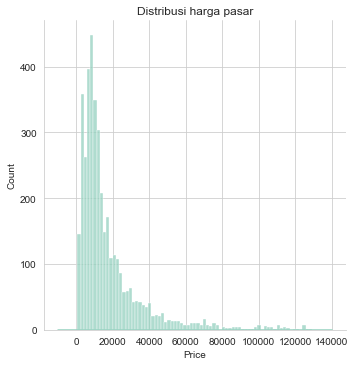

In [23]:
plt.figure(figsize=[11,15])
sns.displot(data_1['Price']))
plt.title('Distribusi harga pasar')

# Mialgea Column

Text(0.5, 1.0, 'EngineV Distribution Plot')

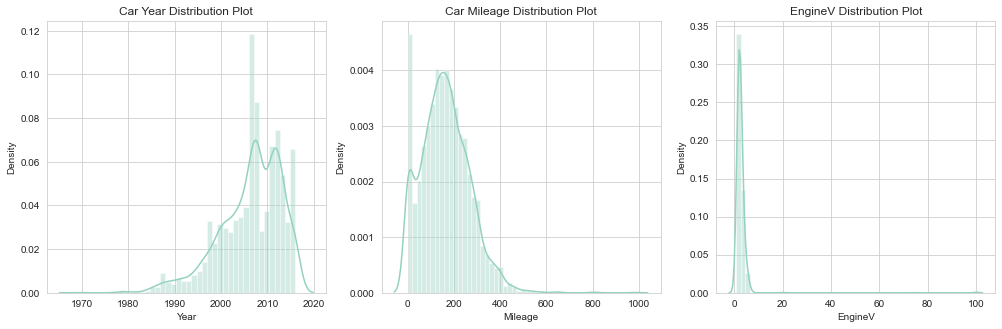

In [25]:


# car and mileage Distribution Plot
plt.figure(figsize=[17,5])
plt.subplot(1,3,1)
sns.distplot(df_no_mv['Year'])
plt.title('Car Year Distribution Plot')

plt.subplot(1,3,2)
sns.distplot(df_no_mv['Mileage'])
plt.title('Car Mileage Distribution Plot')

plt.subplot(1,3,3)
sns.distplot(df_no_mv['EngineV'])
plt.title('EngineV Distribution Plot')



In [27]:
#### Here, the outliers are situated around the higher prices (right side of the graph)
#### we can deal with the problem easily by removing 0.5%, or 1% of the problematic samples
# This is a dataset about used cars, therefore one can imagine how $300,000 is an excessive price
# Outliers are a great issue for OLS, thus we must deal with them in some way

# Let's declare a variable that will be equal to the 99th percentile of the 'Price' variable
q = df_no_mv['Price'].quantile(0.99)

4# Then we can create a new df, with the condition that all prices must be below the 99 percentile of 'Price'
data_1 = df_no_mv[df_no_mv['Price']<q]

Text(0.5, 1.0, 'Car Price Distribution Plot')

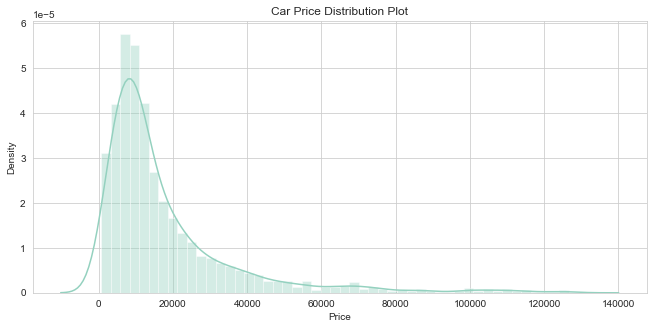

In [28]:
#check the PDF once again
plt.figure(figsize=[11,5])
sns.distplot(data_1['Price'])
plt.title('Car Price Distribution Plot')


Text(0.5, 1.0, 'Car Mileage Distribution Plot')

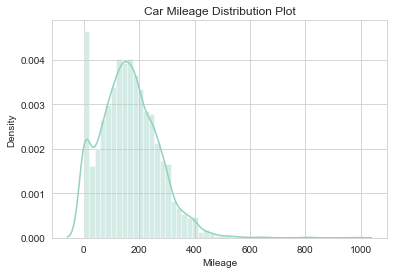

In [29]:


#Now we can treat the other numerical variables outlier in a similar way
sns.distplot(df_no_mv['Mileage'])
plt.title('Car Mileage Distribution Plot')

In [31]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<q]

<AxesSubplot:xlabel='Mileage', ylabel='Density'>

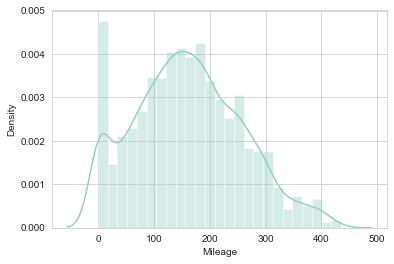

In [33]:
# Hurray this plot looks kind of normal
sns.distplot(data_2['Mileage'])

<AxesSubplot:xlabel='Year', ylabel='Density'>

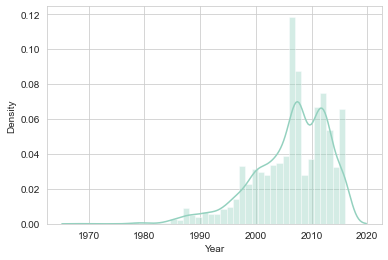

In [34]:
# In this scenario outliers are on the low end
sns.distplot(df_no_mv['Year'])

In [35]:
q = data_2['Year'].quantile(0.01)
data_3 = data_2[data_2['Year']>q]

<AxesSubplot:xlabel='Year', ylabel='Density'>

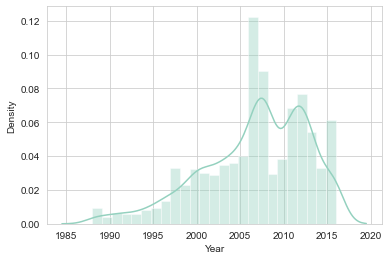

In [36]:
sns.distplot(data_3['Year'])

# EigenV column

Text(0.5, 1.0, 'EngineV Distribution Plot')

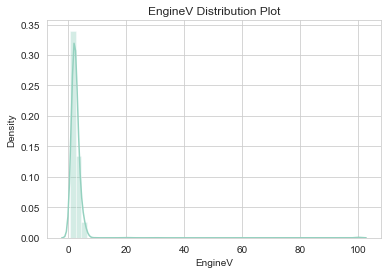

In [37]:
# The situation with engine volume is very strange
# In such cases it makes sense to manually check what may be causing the problem
# In our case the issue comes from the fact that most missing values are indicated with 99.99 or 99
# There are also some incorrect entries like 75
sns.distplot(df_no_mv['EngineV'])
plt.title('EngineV Distribution Plot')

In [39]:
# Car engine volumes are usually (always?) below 6.5l, You can google it
# This is a prime example of the fact that a domain expert (a person working in the car industry)
# may find it much easier to determine problems with the data than an outsider
data_4 = data_3[data_3['EngineV']<6.5]

<AxesSubplot:xlabel='EngineV', ylabel='Density'>

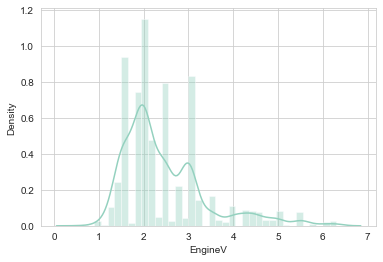

In [40]:
# now its looks kind of normal
sns.distplot(data_4['EngineV'])

In [41]:
# Reset index
cleaned_data = data_4.reset_index(drop=True)

In [42]:
# Reset index
cleaned_data = data_4.reset_index(drop=True)

In [43]:
# once again checking discriptive statistics
cleaned_data.describe()

,Price,Mileage,EngineV,Year
count,3867.000000,3867.000000,3867.000000,3867.000000
mean,18194.455679,160.542539,2.450440,2006.709853
std,19085.855165,95.633291,0.949366,6.103870
min,800.000000,0.000000,0.600000,1988.000000
25%,7200.000000,91.000000,1.800000,2003.000000
50%,11700.000000,157.000000,2.200000,2008.000000
75%,21700.000000,225.000000,3.000000,2012.000000
max,129222.000000,435.000000,6.300000,2016.000000


Text(0.5, 1.0, 'Price and EngineV')

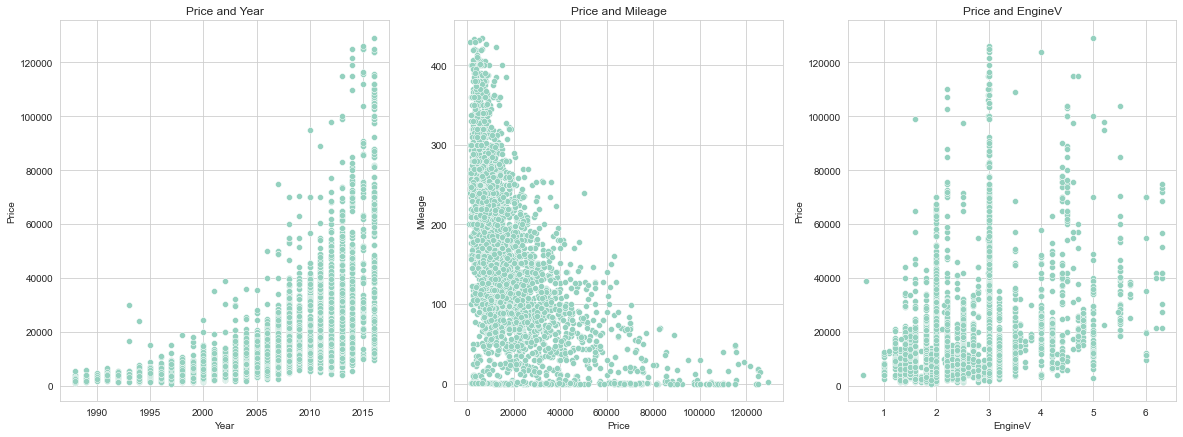

In [44]:
#Scatter Plot of independent variables vs dependent variables
plt.figure(figsize=[20,7])
plt.subplot(1,3,1)
plt.title("Price and Year")
sns.scatterplot(x='Year',y='Price',data=cleaned_data)

plt.subplot(1,3,2)
plt.title("Price and Mileage")
sns.scatterplot(x='Price',y='Mileage',data=cleaned_data)

plt.subplot(1,3,3)
sns.scatterplot(y='Price',x='EngineV',data=cleaned_data)
plt.title("Price and EngineV")

<AxesSubplot:xlabel='Price', ylabel='Density'>

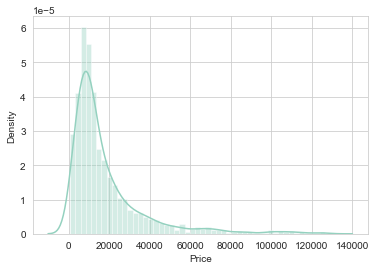

In [45]:
#recall the distribution plot of price
sns.distplot(cleaned_data['Price'])

In [46]:
# Let's transform 'Price' with a log transformation
log_price = np.log(cleaned_data['Price'])

# Then we add it to our data frame
cleaned_data['log_price'] = log_price
cleaned_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,9.814656


In [49]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = cleaned_data[['Mileage','Year','EngineV']]
vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(variables.values, i) for i in range(variables.shape[1])]
# Finally, I like to include names so it is easier to explore the result
vif["Features"] = variables.columns
vif

,VIF,Features
0,3.791584,Mileage
1,10.354854,Year
2,7.662068,EngineV


In [50]:
# 'Year' has high VIF so we are just droping that column
# So even if EngineV seems with a high VIF, too, once 'Year' is gone that will no longer be the case
data_no_multicolinearity = cleaned_data.drop('Year',axis=1)

In [52]:
data_no_multicolinearity.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,9.495519
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,9.814656


# Feature Selection

In [53]:
from sklearn.preprocessing import LabelEncoder
temp_data = data_no_multicolinearity.copy()
for col in temp_data.columns:
    if temp_data[col].dtypes == 'object':
        encoder = LabelEncoder()
        temp_data[col] = encoder.fit_transform(temp_data[col])
        
# Correated Features with target variable
print('\n--Correated Features with target variable--\n')
print(abs(temp_data.corrwith(temp_data['log_price'])).sort_values(ascending=False)[1:])


--Correated Features with target variable--

Price           0.856241
Mileage         0.614806
Registration    0.462986
EngineV         0.411935
Body            0.387294
Brand           0.099597
Engine Type     0.014890
dtype: float64


<AxesSubplot:>

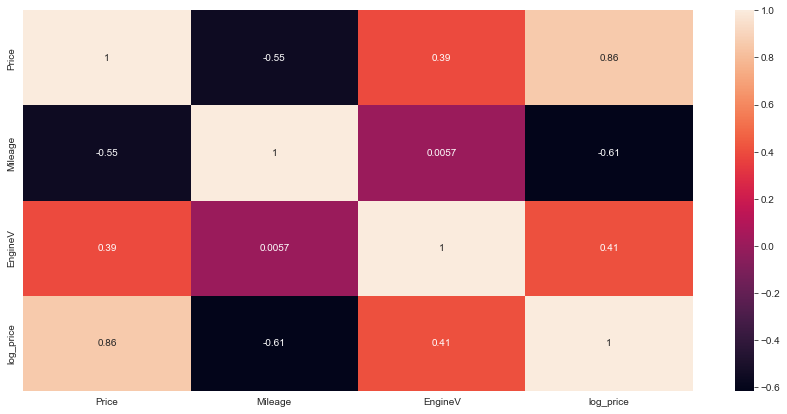

In [54]:
# correlation heat map
plt.figure(figsize=[15,7])
sns.heatmap(data_no_multicolinearity.corr(), annot=True)

In [55]:
# Important feature using ExtraTreesRegressor
from sklearn.ensemble import ExtraTreesRegressor
X = temp_data.drop('log_price',axis=1)
y = temp_data['log_price']
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

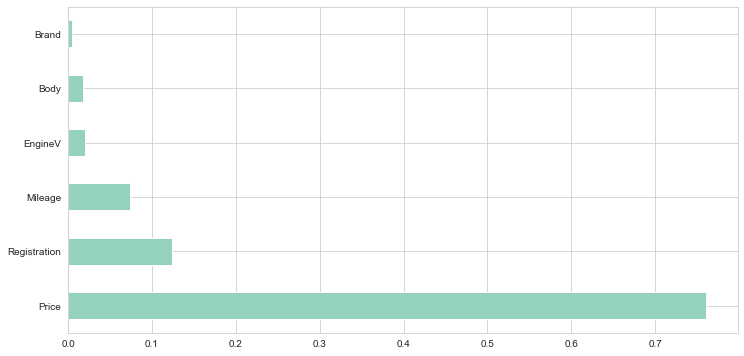

In [56]:
# plot graph of feature importances for better visualization
plt.figure(figsize=[12,6])
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(6).plot(kind='barh')
plt.show()

In [57]:
print(feat_importances.sort_values(ascending=False))

Price           0.760281
Registration    0.123557
Mileage         0.073471
EngineV         0.019673
Body            0.018198
Brand           0.004339
Engine Type     0.000480
dtype: float64


# Categorical Feature

In [58]:
#Creating Dummie Variables
data_with_dummies = pd.get_dummies(data_no_multicolinearity,drop_first=True)

In [59]:
data_with_dummies.head()

,Price,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,4200.0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,7900.0,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,13300.0,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,23000.0,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,18300.0,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


# Model Development

In [62]:
x = data_with_dummies.drop('log_price',axis=1)
y = data_with_dummies['log_price']

### Feature Scaling

In [63]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x[['Mileage','EngineV']])

StandardScaler()

In [64]:
# It is not usually recommended to standardize dummy variables
#For ML purposes we rarely put too much thought into it and go with the scale dummies as 
#scaling has no effect on their predictive power.
inputs_scaled = scaler.transform(x[['Mileage','EngineV']])
scaled_data = pd.DataFrame(inputs_scaled,columns=['Mileage','EngineV'])

In [65]:
input_scaled2 =scaled_data.join(x.drop(['Mileage','EngineV'],axis=1))

## Training dan Testing

In [66]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(input_scaled2,y,test_size=0.2, random_state=365)

# Linear Regression Model

In [69]:
# Model Building
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# Training Model
lr.fit(x_train,y_train)

# Model Summary
y_pred_lr = lr.predict(x_test)

r_squared = r2_score(y_test,y_pred_lr)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_lr))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.8671662016386626
RMSE : 0.328579468537177


# Random Forest regressor model

In [70]:
# Model Building
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

# Training Model
rf.fit(x_train,y_train)

# Model Summary
y_pred_rf = rf.predict(x_test)

r_squared = r2_score(y_test,y_pred_rf)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_rf))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.9999952475093244
RMSE : 0.001965381047895095


## GBT Regressor Model (Gradien Boost Tree)

In [71]:
# Model Building
from sklearn.ensemble import GradientBoostingRegressor
gbt = GradientBoostingRegressor()

# Training Model
gbt.fit(x_train,y_train)

# Model Summary
y_pred_gbt = gbt.predict(x_test)

r_squared = r2_score(y_test,y_pred_gbt)
rmse = np.sqrt(mean_squared_error(y_test,y_pred_gbt))
print("R_squared :",r_squared)
print("RMSE :",rmse)

R_squared : 0.9999260703591092
RMSE : 0.007751672669523064


In [72]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, y_pred_gbt))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_gbt))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_gbt)))

MAE: 0.005645530542613341
MSE: 6.008842917543083e-05
RMSE: 0.007751672669523064


## Predictions

In [73]:
# Finally, let's manually check these predictions
# To obtain the actual prices, we take the exponential of the log_price
df_ev = pd.DataFrame(np.exp(y_pred_gbt), columns=['Predicted Price'])

# We can also include the Actual price column in that data frame (so we can manually compare them)
y_test = y_test.reset_index(drop=True)
df_ev['Actual Price'] = np.exp(y_test)

# we can calculate the difference between the targets and the predictions
df_ev['Residual'] = df_ev['Actual Price'] - df_ev['Predicted Price']
df_ev['Difference%'] = np.absolute(df_ev['Residual']/df_ev['Actual Price']*100)

pd.set_option('display.float_format', lambda x: '%.2f' % x)
df_ev.sort_values(by=['Difference%'])

df_ev.tail(5)

,Predicted Price,Actual Price,Residual,Difference%
769,29776.78,29500.00,-276.78,0.94
770,9578.73,9600.00,21.27,0.22
771,18026.11,18300.00,273.89,1.50
772,67135.48,68500.00,1364.52,1.99
773,10779.80,10800.00,20.20,0.19
